# Assignment #1: Calculating Stock Returns II (Applied)

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import yfinance as yf

 """Retrieves historical data from Yahoo Finance.

    :param instrument: The a stock instrument code to query.
    :param start_date: The start date for the query (inclusive).
    :param end_date: The end date for the query (inclusive).
    :param date_format_string: If `start_date` or `end_date` is not a :class:`DateTime` object,
        the object passed in (string) will be parsed to the format string. Default: `%Y-%m-%d`.
    :param event: A `DataEvent` constant to determine what event to query for. Default: `DataEvent.HISTORICAL_PRICES`.
    :param frequency: A `DataFrequency` constant to determine the interval between records. Default: `DataFrequency.DAILY`.
    :param locale: A `Locale` constant to determine which domain to query from. Default: `Locale.US`.

    :return: :class:`HistoricalPrices` object
    :rtype: `HistoricalPrices`

    E.g. https://finance.yahoo.com/quote/AAPL/history

    Usage::

      >>> from yahoofinance import HistoricalPrices
      >>> req = HistoricalPrices('AAPL')
      Object<HistoricalPrices>
    """

In [12]:
import datetime

In [15]:
FORMAT = '%Y-%m-%d'
today_str = datetime.datetime.today().strftime(format=FORMAT)
today_str

'2023-11-12'

In [16]:
# Get the data for the stock IWM
start_date = '2001-01-01'
end_date = today_str
data = yf.download('IWM','2000-01-01', today_str)

[*********************100%%**********************]  1 of 1 completed


In [18]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-26,45.531250,45.718750,45.312500,45.718750,33.606339,74800
2000-05-30,46.375000,47.406250,46.375000,47.406250,34.846775,57600
2000-05-31,47.562500,48.187500,47.562500,47.578125,34.973118,36000
2000-06-01,48.554688,48.656250,48.554688,48.656250,35.765633,7000
2000-06-02,50.859375,51.187500,50.859375,51.187500,37.626259,29400
...,...,...,...,...,...,...
2023-11-06,174.490005,174.779999,171.389999,172.309998,172.309998,35294400
2023-11-07,171.559998,172.509995,170.570007,171.699997,171.699997,31168900
2023-11-08,171.699997,172.130005,169.300003,169.869995,169.869995,44938600


### Problem #1: Compute daily returns for the stock for the entire sample duration.

In [28]:
df = pd.DataFrame(data['Close'])
df = df.rename(columns={'Close': 'price_t'})
df.head()

,price_t
Date,
2000-05-26,45.718750
2000-05-30,47.406250
2000-05-31,47.578125
2000-06-01,48.656250
2000-06-02,51.187500


In [29]:
# calculate return
# get prev day / today - 1
df['price_t-1'] = df['price_t'].shift(1)
df.head()

,price_t,price_t-1
Date,,
2000-05-26,45.718750,NaN
2000-05-30,47.406250,45.718750
2000-05-31,47.578125,47.406250
2000-06-01,48.656250,47.578125
2000-06-02,51.187500,48.656250


In [36]:
df['returns_manual'] = ( df['price_t'] / df['price_t-1'] ) - 1
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method
Date,,,,
2000-05-26,45.718750,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,0.036910,0.036910
2000-05-31,47.578125,47.406250,0.003626,0.003626
2000-06-01,48.656250,47.578125,0.022660,0.022660
2000-06-02,51.187500,48.656250,0.052023,0.052023


In [35]:
df['returns_pct_change_method'] = df['price_t'].pct_change()
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method
Date,,,,
2000-05-26,45.718750,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,-0.035597,0.036910
2000-05-31,47.578125,47.406250,-0.003612,0.003626
2000-06-01,48.656250,47.578125,-0.022158,0.022660
2000-06-02,51.187500,48.656250,-0.049451,0.052023


In [38]:
df['returns'] = (df['price_t'] / df['price_t'].shift(1)) - 1
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
Date,,,,,
2000-05-26,45.718750,NaN,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,0.036910,0.036910,0.036910
2000-05-31,47.578125,47.406250,0.003626,0.003626,0.003626
2000-06-01,48.656250,47.578125,0.022660,0.022660,0.022660
2000-06-02,51.187500,48.656250,0.052023,0.052023,0.052023


### Problem #2: Plot the daily price of the stock and its daily returns in a line chart / graph.

<Axes: xlabel='Date'>

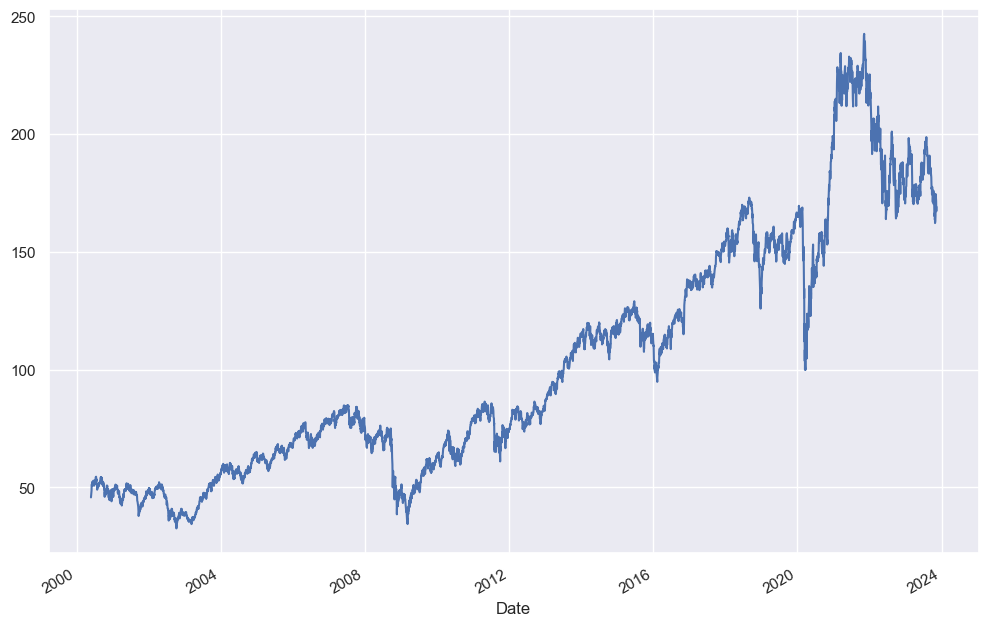

In [40]:
df['price_t'].plot(figsize=(12, 8))

<Axes: xlabel='Date'>

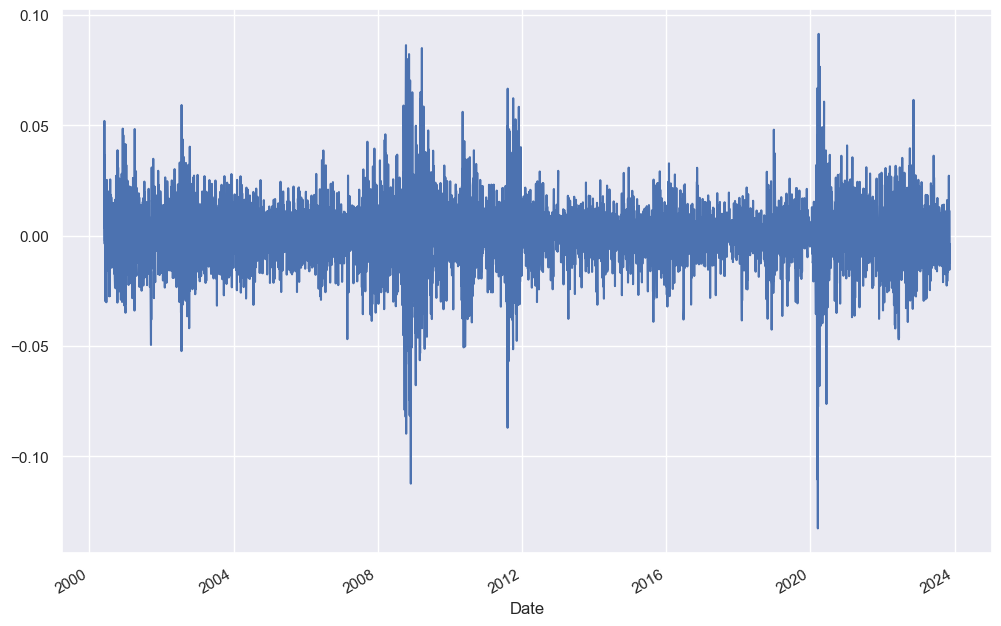

In [41]:
df['returns'].plot(figsize=(12,8))

# Assignment #2: Expected Returns using Average (Mean) Method

In [44]:
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
Date,,,,,
2000-05-26,45.718750,NaN,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,0.036910,0.036910,0.036910
2000-05-31,47.578125,47.406250,0.003626,0.003626,0.003626
2000-06-01,48.656250,47.578125,0.022660,0.022660,0.022660
2000-06-02,51.187500,48.656250,0.052023,0.052023,0.052023


### Problem 1: Calculate the annual expected return, conditional on weekly returns data.

In [56]:
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns
Date,,,,,
2000-05-26,45.718750,NaN,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,0.036910,0.036910,0.036910
2000-05-31,47.578125,47.406250,0.003626,0.003626,0.003626
2000-06-01,48.656250,47.578125,0.022660,0.022660,0.022660
2000-06-02,51.187500,48.656250,0.052023,0.052023,0.052023


In [46]:
iwm_mean = df['returns'].mean()
iwm_mean

0.00033780754677494306

In [51]:
f'{iwm_mean * 100:.2f}%'

'0.03%'

In [53]:
# annual expected return
# crude
annualized_return_crude = iwm_mean * 252
annualized_return_crude

0.08512750178728565

In [54]:
annualized_return_soph = (1 + iwm_mean) ** 252 - 1
annualized_return_soph

0.0888402365996408

In [59]:
df['weekly_returns'] = df['price_t'] / df['price_t'].shift(5) - 1
df.head(10)

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns,weekly_returns
Date,,,,,,
2000-05-26,45.718750,NaN,NaN,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,0.036910,0.036910,0.036910,NaN
2000-05-31,47.578125,47.406250,0.003626,0.003626,0.003626,NaN
2000-06-01,48.656250,47.578125,0.022660,0.022660,0.022660,NaN
2000-06-02,51.187500,48.656250,0.052023,0.052023,0.052023,NaN
2000-06-05,51.000000,51.187500,-0.003663,-0.003663,-0.003663,0.115516
2000-06-06,51.500000,51.000000,0.009804,0.009804,0.009804,0.086355
2000-06-07,51.562500,51.500000,0.001214,0.001214,0.001214,0.083744
2000-06-08,51.437500,51.562500,-0.002424,-0.002424,-0.002424,0.057161


<Axes: xlabel='Date'>

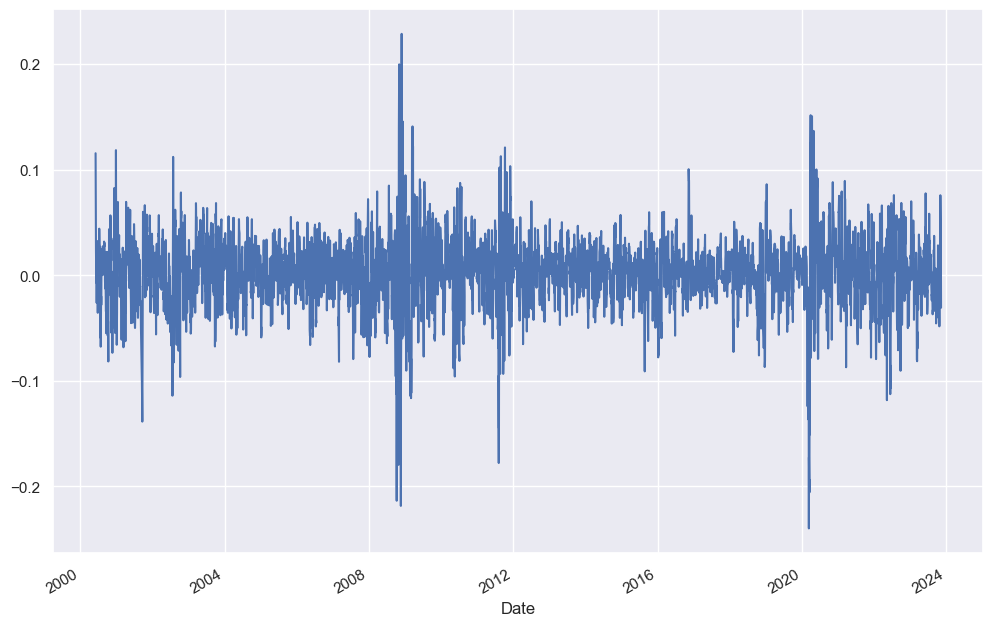

In [60]:
df['weekly_returns'].plot(figsize=(12,8))

In [63]:
iwm_weekly_returns_mean = df['weekly_returns'].mean()
iwm_weekly_returns_mean

0.001591453634489045

In [66]:
iwm_weekly_mean_crude = iwm_weekly_returns_mean * 52
iwm_weekly_mean_crude

0.08275558899343033

In [67]:
iwm_weekly_mean_soph = (1 + iwm_weekly_returns_mean) ** 52 - 1
iwm_weekly_mean_soph

0.08620482416793762

### Problem 2: Extend the getExpectedReturns function created in the video to  
### &emsp;&emsp;&emsp;&emsp; incorporate computations of Expected Returns using weekly data AND daily data.

In [70]:
def getExpectedReturns(prices, period='daily', method='soph'):
    if period == 'daily':
        interval = 1
        compound_factor = 252
    else:
        interval = 5
        compound_factor = 52
    returns = (prices / prices.shift(interval)) - 1

    avg_return = returns.mean()

    if method == 'soph':
        annualized_return = (1 + avg_return) ** compound_factor - 1
    else:
        annualized_return = avg_return * compound_factor

    return annualized_return

In [71]:
df.head()

,price_t,price_t-1,returns_manual,returns_pct_change_method,returns,weekly_returns
Date,,,,,,
2000-05-26,45.718750,NaN,NaN,NaN,NaN,NaN
2000-05-30,47.406250,45.718750,0.036910,0.036910,0.036910,NaN
2000-05-31,47.578125,47.406250,0.003626,0.003626,0.003626,NaN
2000-06-01,48.656250,47.578125,0.022660,0.022660,0.022660,NaN
2000-06-02,51.187500,48.656250,0.052023,0.052023,0.052023,NaN


In [72]:
# soph method and daily
getExpectedReturns(df['price_t'])

0.0888402365996408

In [74]:
# soph method and weekly
getExpectedReturns(df['price_t'], period='weekly')

0.08620482416793762

In [76]:
# crude method and daily
getExpectedReturns(df['price_t'], method='crude', period='daily')

0.08512750178728565

In [77]:
# crude method and daily
getExpectedReturns(df['price_t'], method='crude', period='weekly')

0.08275558899343033

# Comparing IWM to SPY

In [100]:
# Get the data for the stock SPY
ticker = 'SPY'
start_date = '2012-01-01'
end_date = today_str
data = yf.download(ticker, start_date, today_str)

[*********************100%%**********************]  1 of 1 completed


In [104]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,102.458961,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,102.619690,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,102.892899,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,102.627716,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,102.876854,99530200


In [105]:
getExpectedReturns(data['Close'], period='daily')

0.12634572977051794

In [106]:
getExpectedReturns(data['Close'], period='weekly')

0.12740673099433608

In [107]:
# Get the data for the stock IWM
ticker = 'IWM'
start_date = '2012-01-01'
end_date = today_str
data = yf.download(ticker, start_date, today_str)

[*********************100%%**********************]  1 of 1 completed


In [108]:
getExpectedReturns(data['Close'], period='daily')

0.09545755844328463

In [109]:
getExpectedReturns(data['Close'], period='weekly')

0.09850417561495362

# Assignment #4: Estimating The Total Risk of a Stock II - Applied

## Variance and std

In [121]:
# Get the data for the stock IWM
ticker = 'IWM'
start_date = '2000-01-01'
end_date = today_str
data = yf.download(ticker, start_date, today_str)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-26,45.531250,45.71875,45.312500,45.718750,33.606350,74800
2000-05-30,46.375000,47.40625,46.375000,47.406250,34.846767,57600
2000-05-31,47.562500,48.18750,47.562500,47.578125,34.973125,36000
2000-06-01,48.554688,48.65625,48.554688,48.656250,35.765621,7000
2000-06-02,50.859375,51.18750,50.859375,51.187500,37.626247,29400


In [122]:
iwm = pd.DataFrame(data['Close']).rename(columns={'Close':'price_t'})
iwm.head()

,price_t
Date,
2000-05-26,45.718750
2000-05-30,47.406250
2000-05-31,47.578125
2000-06-01,48.656250
2000-06-02,51.187500


In [123]:
iwm['daily_returns'] = (iwm['price_t'] / iwm['price_t'].shift(1)) - 1
iwm.head()

,price_t,daily_returns
Date,,
2000-05-26,45.718750,NaN
2000-05-30,47.406250,0.036910
2000-05-31,47.578125,0.003626
2000-06-01,48.656250,0.022660
2000-06-02,51.187500,0.052023


In [126]:
iwm_mean = iwm['daily_returns'].mean()
iwm_mean

0.00033780754677494306

In [127]:
iwm['deviations'] = iwm['daily_returns'] - iwm_mean
iwm.head()

,price_t,daily_returns,deviations
Date,,,
2000-05-26,45.718750,NaN,NaN
2000-05-30,47.406250,0.036910,0.036573
2000-05-31,47.578125,0.003626,0.003288
2000-06-01,48.656250,0.022660,0.022322
2000-06-02,51.187500,0.052023,0.051685


In [128]:
iwm['squared_deviations'] = iwm['deviations'] ** 2
iwm.head()

,price_t,daily_returns,deviations,squared_deviations
Date,,,,
2000-05-26,45.718750,NaN,NaN,NaN
2000-05-30,47.406250,0.036910,0.036573,0.001338
2000-05-31,47.578125,0.003626,0.003288,0.000011
2000-06-01,48.656250,0.022660,0.022322,0.000498
2000-06-02,51.187500,0.052023,0.051685,0.002671


In [131]:
sum_squared_deviations = np.sum(iwm['squared_deviations'])
sum_squared_deviations

1.366234528894236

### Daily Variance

In [134]:
var_iwm = sum_squared_deviations / (len(iwm['squared_deviations'].dropna()) - 1)
var_iwm

0.00023152593270534417

### Daily std

In [143]:
std_iwm = np.sqrt(var_iwm)
std_iwm

0.015215976232412567

### Annualized std

In [144]:
annualized_std = std_iwm * np.sqrt(252)
annualized_std

0.2415461343961992

### Portfolio Risk Example

NFLX - 20 shares  
SPOT - 20 shares  
  
NFLX price - $354.67  
SPOT price - $174.45  
  
Total Risk NFLX - 24.39%  
Total Risk SPOT - 31.94%  
  
Covariance - 0.01792  

In [146]:
nflx_price = 354.67
spot_price = 174.45

In [149]:
nflx_risk = 24.39 / 100
spot_risk = 31.94 / 100

In [150]:
covariance = 0.01792

In [147]:
pf_value = nflx_price * 20 + spot_price * 20
pf_value

10582.400000000001

In [155]:
nflx_weight = (nflx_price * 20) / pf_value
spot_weight = (spot_price * 20) / pf_value
print("NFLX:", nflx_weight)
print("SPOT:", spot_weight)

NFLX: 0.6703016328999093
SPOT: 0.32969836710009065


In [158]:
# (nflx_weight ^ 2 * nflx_risk ^ 2) + (spot_weight ^ 2 * nflx_risk ^ 2) + 2*nflx_weight*spot_weight*covariance(nflx,spot)
pf_var = nflx_weight**2 * nflx_risk**2 + spot_weight**2 * spot_risk**2 + 2*nflx_weight*spot_weight*covariance
pf_var

0.0457376848661197

In [159]:
pf_std = np.sqrt(pf_var)
pf_std

0.21386370628538096